# Terza prova machine learning 15/01/2021

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
random_state = 42

In [52]:
import matplotlib.pyplot as plt


In [53]:
df = pd.read_csv("exam_2021_01_15.csv",sep=",")
X = df.drop("y",axis=1)
y = df["y"]

In [54]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
n_clusters = range(2,11)
silhouette_scores = []
inertia = []
for n in n_clusters:
    km = KMeans(n_clusters=n,random_state=random_state)
    y_pred = km.fit_predict(X)
    silhouette_scores.append(silhouette_score(X,y_pred))
    inertia.append(km.inertia_)

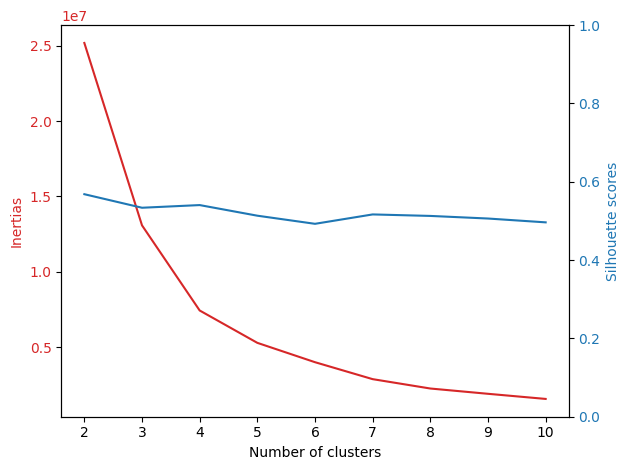

In [55]:
def two_plots(x, y1, y2, xlabel, y1label, y2label):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(y1label, color=color)
    ax1.plot(x, y1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel(y2label, color=color)  # we already handled the x-label with ax1
    ax2.plot(x, y2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim(0,1) # the axis for silhouette is [0,1]

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
two_plots(x=n_clusters, y1=inertia, y2=silhouette_scores
          , xlabel='Number of clusters', y1label='Inertias', y2label='Silhouette scores'
         )

In [56]:
k = 3
km_best = KMeans(n_clusters=k,random_state=random_state)
y_km = km_best.fit_predict(X)
print(silhouette_score(X,y_km))

0.5337106344943366


In [57]:
# Remapping
class_sizes = {0:0,1:0,1:0}
for i in np.array(df["y"].values,dtype=int):
    class_sizes[i] = int(class_sizes.get(i,0)) + 1
print(class_sizes)
class_sizes = {0:0,1:0,1:0}
for i in np.array(y_km,dtype=int):
    class_sizes[i] = int(class_sizes.get(i,0)) + 1
print(class_sizes)

{0: 334, 1: 333, 2: 333}
{0: 345, 1: 420, 2: 235}


In [58]:
from sklearn.metrics import confusion_matrix
def remap(y_true,y_pred):
    y_mapped =y_pred.copy()
    for label in np.unique(y_pred):
        true_l,count = np.unique(y_true[y_pred == label],return_counts = True)
        y_mapped[y_pred == label] = true_l[np.argmax(count)]
    return y_mapped
y_km = remap(y_true = y, y_pred = y_km)
from max_diag import max_diag
print(max_diag(confusion_matrix(y,y_km,normalize="true")))

[[0.7245509  0.26646707 0.00898204]
 [0.25225225 0.54354354 0.2042042 ]
 [0.05705706 0.45045045 0.49249249]]


In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X_scaled

Normalizer(copy=False,
           norm=           A0        A1        A2
0    0.920959  0.187350  0.020071
1    0.420655  0.109367  0.521198
2    0.320742  0.083191  0.815046
3    0.490599  0.808861  0.848830
4    0.575483  0.856884  0.885065
..        ...       ...       ...
995  0.509080  0.818427  0.122957
996  0.392723  0.168471  0.074819
997  0.598165  0.149380  0.518542
998  0.599659  0.887061  0.609348
999  0.669689  0.272927  0.316051

[1000 rows x 3 columns])